In [1]:
%matplotlib inline
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import math

In [2]:
#load image
I = Image.open('Image_Data/i.png')
key1 = Image.open('Image_Data/key1.png')
key2 = Image.open('Image_Data/key2.png')
E = Image.open('Image_Data/E.png')
I = np.array(I)
key1 = np.array(key1)
key2 = np.array(key2)
E = np.array(E)

In [3]:
#data process
height = I.shape[0]
width = I.shape[1]
x = [[] for i in range(height) for j in range(width)]
y = []
for i in range(height):
    for j in range(width):
        x[i*width+j].append(key1[i][j])
        x[i*width+j].append(key2[i][j])
        x[i*width+j].append(I[i][j])
        y.append(E[i,j])
x = np.array(x)
y = np.array(y)

In [4]:
#initialize
w = np.zeros(len(x[0]))
l_rate =  1e-8
Max_epochs = 100
x_t = x.transpose()
Batch_Size = 32
num = height * width / Batch_Size

In [5]:
#random
def Random(x,y):
    rand = np.arange(len(x))
    np.random.shuffle(rand)
    return (x[rand], y[rand])

In [6]:
#training
epoch = 0
w2 = w
loss = 0
while (epoch==0 or (epoch < Max_epochs and np.abs(np.subtract(w,w2).sum()) > 1e-6)):
    w2 = w
    x , y = Random(x,y)
    for i in range(int(num)):
        x_batch = x[i*Batch_Size:(i+1)*Batch_Size]
        y_batch = y[i*Batch_Size:(i+1)*Batch_Size]
        pred = np.dot(x_batch,w)
        x_t = x_batch.transpose()
        cost = y_batch - pred
        loss += np.sum(cost**2) / len(x_batch) # Σ(y-y')^2
        gra =  -2*np.dot(x_t,cost) # -2*Σ(y-y')*x
        w = w - (l_rate * gra)
    epoch+=1
    loss = loss/num
    print("epoch: %d, error: %lf" %(epoch,loss))
    
print(w)

epoch: 1, error: 106.878017
epoch: 2, error: 0.111869
epoch: 3, error: 0.083377
epoch: 4, error: 0.083382
epoch: 5, error: 0.083369
epoch: 6, error: 0.083382
epoch: 7, error: 0.083375
epoch: 8, error: 0.083375
epoch: 9, error: 0.083374
epoch: 10, error: 0.083370
epoch: 11, error: 0.083374
epoch: 12, error: 0.083384
epoch: 13, error: 0.083377
epoch: 14, error: 0.083368
epoch: 15, error: 0.083374
epoch: 16, error: 0.083380
epoch: 17, error: 0.083379
epoch: 18, error: 0.083373
epoch: 19, error: 0.083376
epoch: 20, error: 0.083368
[ 0.2500258   0.65998725  0.09003878]


In [7]:
#save weight
np.savetxt('Weight.txt',w)

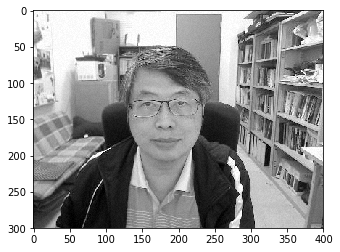

In [8]:
#decrypt
Eprime = Image.open('Image_Data/Eprime.png')
Eprime = np.array(Eprime)
ans = Image.new(mode='L', size=(E.shape[1],E.shape[0]))
p_ans = ans.load()
for i in range(E.shape[0]):
    for j in range(E.shape[1]):
        temp = (Eprime[i][j]-w[0]*key1[i][j]-w[1]*key2[i][j])/w[2]
        p_ans[j,i] = int(temp)
imshow(np.array(ans),cmap=plt.cm.gray)

In [9]:
ans.save('decrypt.png')